# Explolatory Data Analysis For TDHS-MIS2022 Dataset

## Understanding the problem

Low Birth Weight (LWB) is a major contributor to **neonatal mortality**. The LBW infants who survive infancy are at increased risk of long-term consequences such as **neurodevelopmental problems**, **stunting**, **respiratory disorders**, **lower IQ**, and **adult-onset chronic diseases**. Additionally, when LBW girls become mothers, they are more likely to deliver LBW infants themselves. Thus, reducing the incidence of LBW has public health implications that are lifelong and inter-generational.

Therefore, the main objective of this study is to determine the **risk factors** of low birth weight and **predict low birth weight** babies based on machine learning algorithms. Keep in mind that, whether a baby is born **premature** or **at term** (on time) but didn't grow enough during pregnancy, they can be classified as a low birth weight baby, and **by definition**, A LBW baby weighs **less than 2500 grams**, or 5 lbs, 5 oz.



## Type of the Problem

At first glance, the problem can be treated as a regression problem, but for convinience, we decided to treat it as a **classification** problem where we have to determine the risk factors of low birth weight and predict low birth weight babies using artificial intelligence techniques.

## Load Python Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [4]:
# Import data
data= pd.read_csv('/Users/kalokola/group5/Low-Birth-Weight-Prediction-app/DATA/original_dataset.csv')

In [5]:
# Print shape of dataset imported
data.shape

(10783, 1325)

In [6]:
# Print five first records/rows of imported dataset
data.head()

,Unnamed: 0,caseid,bidx,v000,v001,v002,v003,v004,v005,v006,...,s631as,s631at,s631au,s631av,s631aw,s631ax,s631ay,s631az,s633b,s633c
0,0,1 9 2,1,TZ8,1,9,2,1,1409657,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1 16 1,1,TZ8,1,16,1,1,1409657,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1 30 2,1,TZ8,1,30,2,1,1409657,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1 41 2,1,TZ8,1,41,2,1,1409657,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1 41 2,2,TZ8,1,41,2,1,1409657,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Print five last records/rows of imported dataset
data.tail()

,Unnamed: 0,caseid,bidx,v000,v001,v002,v003,v004,v005,v006,...,s631as,s631at,s631au,s631av,s631aw,s631ax,s631ay,s631az,s633b,s633c
10778,10778,629 87 2,1,TZ8,629,87,2,629,141449,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10779,10779,629 87 2,2,TZ8,629,87,2,629,141449,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10780,10780,629 87 2,3,TZ8,629,87,2,629,141449,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10781,10781,629 91 1,1,TZ8,629,91,1,629,141449,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10782,10782,629 91 1,2,TZ8,629,91,1,629,141449,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Selecting predictor variables and target variable

From the **1325** features, we selected 11 features to begin with that will act as **predictor features**, as shown below;

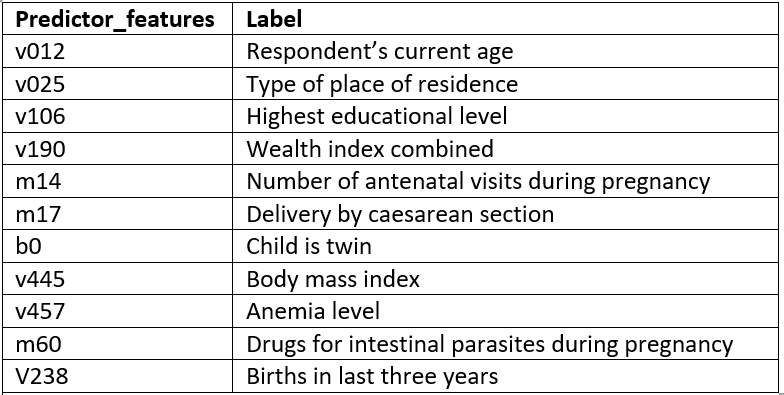

And, the target variable of our choice is **"m19"** which is labeled as **"birth weight in kilograms (3 decimals)"**

In [8]:
# Defining the 10 columns to select as predictor variables
columns_to_select = ['v012', 'v025', 'v106', 'v190', 'm14', 'm17', 'v238', 'b0', 'v445', 'v457', 'm60', 'm19']

# select the columns
New_data = data[columns_to_select]

# print the head results
New_data.shape

(10783, 12)

In [9]:
New_data.head()

,v012,v025,v106,v190,m14,m17,v238,b0,v445,v457,m60,m19
0,42,2,0,1,NaN,NaN,0,0,2041.0,2.0,NaN,NaN
1,40,2,1,2,4.0,0.0,1,0,2514.0,4.0,1.0,3200.0
2,36,2,1,1,4.0,0.0,1,0,2268.0,4.0,1.0,9996.0
3,41,2,1,2,4.0,0.0,1,0,NaN,NaN,1.0,2900.0
4,41,2,1,2,NaN,NaN,1,0,NaN,NaN,NaN,NaN


In [10]:
New_data.tail()

,v012,v025,v106,v190,m14,m17,v238,b0,v445,v457,m60,m19
10778,30,2,2,3,3.0,0.0,3,0,1875.0,4.0,0.0,4000.0
10779,30,2,2,3,NaN,0.0,3,2,1875.0,4.0,NaN,1500.0
10780,30,2,2,3,NaN,0.0,3,1,1875.0,4.0,NaN,2500.0
10781,33,2,2,1,5.0,0.0,1,0,NaN,NaN,1.0,9996.0
10782,33,2,2,1,NaN,NaN,1,0,NaN,NaN,NaN,NaN


## Data cleaning

In [11]:
# Check for missing values
print('missing values:', New_data.isnull().sum())
print('')
print('Total number of missing values is:', New_data.isnull().sum().sum())

missing values: v012       0
v025       0
v106       0
v190       0
m14     4958
m17     4209
v238       0
b0         0
v445    5405
v457    5419
m60     4958
m19     4209
dtype: int64

Total number of missing values is: 29158


In [12]:
# count the number of missing values in each column
missing_counts = New_data.isnull().sum()

# identify columns with more than 5000 missing values
columns_to_drop = missing_counts[missing_counts > 5000].index

# drop the columns with too many missing values
New_data.drop(columns_to_drop, axis=1, inplace=True)

New_data.shape

(10783, 10)

In [13]:
New_data.head()

,v012,v025,v106,v190,m14,m17,v238,b0,m60,m19
0,42,2,0,1,NaN,NaN,0,0,NaN,NaN
1,40,2,1,2,4.0,0.0,1,0,1.0,3200.0
2,36,2,1,1,4.0,0.0,1,0,1.0,9996.0
3,41,2,1,2,4.0,0.0,1,0,1.0,2900.0
4,41,2,1,2,NaN,NaN,1,0,NaN,NaN


#### Cleaning target variable
- For target variable **m19**, Value **'9996'** implied **'not weighed at birth'**, and Value **'9998'** stands for **'Don't know'**.

- We had to remove these values plus any other null values. 

- We found that **4209** features were **null**, **1240** features had the **9996** value, and **176** features had the **9998** value as shown below.

In [14]:
# Checking m19 null values and specific values
m19_unknowns = {
    'not_weighted' :(New_data.m19 == 9996.0).sum(),
    'dont_know' :(New_data.m19 == 9998.0).sum(),
    'null': New_data.m19.isnull().sum()
}
m19_unknowns 

{'not_weighted': np.int64(1240),
 'dont_know': np.int64(176),
 'null': np.int64(4209)}

In [15]:
# Removing Specific Values and Null Values from Column 'm19'
cleaned_data = New_data[~New_data.m19.isin([9996, 9998])].dropna(subset=['m19'])

# Print shape of cleaned data
cleaned_data.shape

(5158, 10)

In [16]:
# Check for missing values
print('missing values:', cleaned_data.isnull().sum())
print('')
print('Total number of missing values is:', cleaned_data.isnull().sum().sum())

missing values: v012      0
v025      0
v106      0
v190      0
m14     531
m17       0
v238      0
b0        0
m60     531
m19       0
dtype: int64

Total number of missing values is: 1062


#### Removing null and specific value for variable m14 and m60

In [17]:
# Removing Specific Value and Null Values from Column 'm14' and 'm60'
new_data = cleaned_data[~cleaned_data.m14.isin([98]) & ~cleaned_data.m14.isin([8])].dropna(subset=['m14','m60'])
new_data.shape

(4501, 10)

In [18]:
# Check for missing values
print('missing values:', new_data.isnull().sum())
print('')
print('Total number of missing values is:', new_data.isnull().sum().sum())

missing values: v012    0
v025    0
v106    0
v190    0
m14     0
m17     0
v238    0
b0      0
m60     0
m19     0
dtype: int64

Total number of missing values is: 0


**Now we don't have missing data in our dataset.**

In [19]:
# Showing some information about the dataset 
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4501 entries, 1 to 10778
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v012    4501 non-null   int64  
 1   v025    4501 non-null   int64  
 2   v106    4501 non-null   int64  
 3   v190    4501 non-null   int64  
 4   m14     4501 non-null   float64
 5   m17     4501 non-null   float64
 6   v238    4501 non-null   int64  
 7   b0      4501 non-null   int64  
 8   m60     4501 non-null   float64
 9   m19     4501 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 386.8 KB


The outshow shows the list of **variables** , **sizes** and **data types** in each variables. This will help us to know our way around **feature engineering.**

In [20]:
# generate descriptive statistics 
new_data.describe()

,v012,v025,v106,v190,m14,m17,v238,b0,m60,m19
count,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000
mean,28.663408,1.677849,1.182404,3.189958,4.118196,0.131526,1.115086,0.035103,0.674739,3164.630082
std,7.057967,0.467352,0.691736,1.370206,1.907012,0.338013,0.328087,0.262659,0.719848,585.447428
min,15.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,500.000000
25%,23.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,2900.000000
50%,28.000000,2.000000,1.000000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,3100.000000
75%,34.000000,2.000000,2.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,3500.000000
max,49.000000,2.000000,3.000000,5.000000,16.000000,1.000000,3.000000,2.000000,8.000000,6000.000000


## Feature Engineering


In [21]:
# Convert the target variable 'm19' into two classes, i.e label 1 if birth weight < 2500 else 0 if birth weight >= 2500
new_data['m19'] = np.where(new_data['m19'] < 2500, 1, 0)

In [22]:
new_data.head()

,v012,v025,v106,v190,m14,m17,v238,b0,m60,m19
1,40,2,1,2,4.0,0.0,1,0,1.0,0
3,41,2,1,2,4.0,0.0,1,0,1.0,0
6,26,2,1,1,2.0,1.0,1,0,1.0,1
8,26,2,1,2,6.0,0.0,1,0,1.0,0
10,28,2,1,2,3.0,0.0,1,0,1.0,1


In [23]:
# Convert the predictor variable 'm14' into two classes, i.e label 1 if ANC visits < 4 to imply the possibility of LBW to occur else 0 if ANC >= 4
new_data['m14'] = np.where(new_data['m14'] < 4, 1, 0)

In [24]:
new_data.head()

,v012,v025,v106,v190,m14,m17,v238,b0,m60,m19
1,40,2,1,2,0,0.0,1,0,1.0,0
3,41,2,1,2,0,0.0,1,0,1.0,0
6,26,2,1,1,1,1.0,1,0,1.0,1
8,26,2,1,2,0,0.0,1,0,1.0,0
10,28,2,1,2,1,0.0,1,0,1.0,1


In [25]:
# Define the bins and labels
bins = [15, 20, 25, 30, 35, 50]
labels = ['15-19', '20-24', '25-29', '30-34', '35-49']

# Convert 'age' column to age group labels
new_data['age_group'] = pd.cut(new_data['v012'], bins=bins, labels=labels, right=False)

# Define a mapping from labels to classes
label_to_class = {'15-19': 0, '20-24': 1, '25-29': 2, '30-34': 3, '35-49': 4}

# Map labels to classes and replace values in 'v012' column
new_data['v012'] = new_data['age_group'].map(label_to_class)

# Drop the 'age_group' column
new_data.drop(columns=['age_group'], inplace=True)

# Print the modified DataFrame
print(new_data.head())


   v012  v025  v106  v190  m14  m17  v238  b0  m60  m19
1     4     2     1     2    0  0.0     1   0  1.0    0
3     4     2     1     2    0  0.0     1   0  1.0    0
6     2     2     1     1    1  1.0     1   0  1.0    1
8     2     2     1     2    0  0.0     1   0  1.0    0
10    2     2     1     2    1  0.0     1   0  1.0    1


In [26]:
# Assuming you have your cleaned dataset in a DataFrame called new_data_cleaned
# Specify the path where you want to save the cleaned data
save_path = '/Users/kalokola/group5/Low-Birth-Weight-Prediction-app/DATA/new_data_cleaned.csv'

# Save the cleaned dataset to a CSV file
new_data.to_csv(save_path, index=False)

In [27]:
from scipy.stats import chi2_contingency

# Specify the path where the cleaned data is saved
load_path = '/Users/kalokola/group5/Low-Birth-Weight-Prediction-app/DATA/new_data_cleaned.csv'

# Load the cleaned dataset into a pandas DataFrame
new_df = pd.read_csv(load_path)

# Print the first few rows to verify the data is loaded correctly
print(new_df.head())

# Summarize counts for 0 and 1 values in respect to the target variable 'm19'
count_0 = new_df[new_df['m19'] == 0].shape[0]
count_1 = new_df[new_df['m19'] == 1].shape[0]

print(f'Count of 0 values in m19: {count_0}')
print(f'Count of 1 values in m19: {count_1}')

# Create a contingency table
contingency_table = pd.crosstab(index=new_df['m19'], columns='count')

# Perform Chi-squared test
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f'Chi-squared test statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: {ex}')

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print('There is a significant difference between the counts of 0 and 1 values in m19.')
else:
    print('There is no significant difference between the counts of 0 and 1 values in m19.')


   v012  v025  v106  v190  m14  m17  v238  b0  m60  m19
0     4     2     1     2    0  0.0     1   0  1.0    0
1     4     2     1     2    0  0.0     1   0  1.0    0
2     2     2     1     1    1  1.0     1   0  1.0    1
3     2     2     1     2    0  0.0     1   0  1.0    0
4     2     2     1     2    1  0.0     1   0  1.0    1
Count of 0 values in m19: 4155
Count of 1 values in m19: 346
Chi-squared test statistic: 0.0
p-value: 1.0
Degrees of freedom: 0
Expected frequencies: [[4155.]
 [ 346.]]
There is no significant difference between the counts of 0 and 1 values in m19.


In [29]:
from scipy.stats import chi2_contingency

# Load the cleaned dataset into a pandas DataFrame
load_path = '/Users/kalokola/group5/Low-Birth-Weight-Prediction-app/DATA/new_data_cleaned.csv'
new_df = pd.read_csv(load_path)

# List of predictor variables (replace with actual column names)
predictor_variables = ['v012', 'v025', 'v106', 'v190', 'm14', 'm17', 'v238', 'b0', 'm60']

# Define classes for LBW and NBW based on m19
lbw_class = 1
nbw_class = 0

# Function to calculate counts for LBW and NBW
def calculate_counts(df, predictor):
    # Filter dataframe for LBW (m19 = 1) and NBW (m19 = 0) separately
    lbw_counts = df[df['m19'] == lbw_class][predictor].value_counts()
    nbw_counts = df[df['m19'] == nbw_class][predictor].value_counts()
    
    # Initialize counts
    #lbw_count_0 = lbw_counts[0] if 0 in lbw_counts.index else 0
    lbw_count = lbw_counts[1] if 1 in lbw_counts.index else 0
    nbw_count = nbw_counts[0] if 0 in nbw_counts.index else 0
    #nbw_count_1 = nbw_counts[1] if 1 in nbw_counts.index else 0
    
    return lbw_count, nbw_count

# Iterate through each predictor variable
for predictor in predictor_variables:
    print(f"Analyzing predictor variable: {predictor}")
    
    # Calculate counts for LBW and NBW
    lbw_count, nbw_count = calculate_counts(new_df, predictor)
    
    #print(f'Count of 0 values for LBW (m19 = 0): {lbw_count_0}')
    print(f'Count of 1 values for LBW (m19 = 0): {lbw_count}')
    print(f'Count of 0 values for NBW (m19 = 1): {nbw_count}')
    #print(f'Count of 1 values for NBW (m19 = 1): {nbw_count_1}')
    
    # Create contingency table
    contingency_table = pd.crosstab(index=new_df['m19'], columns=new_df[predictor])
    
    # Perform Chi-squared test
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    print(f'Chi-squared test statistic: {chi2}')
    print(f'p-value: {p}')
    print(f'Degrees of freedom: {dof}')
    print(f'Expected frequencies: {ex}')
    
    # Interpret the p-value
    alpha = 0.05
    if p < alpha:
        print('There is a significant relationship between predictor and m19.')
    else:
        print('There is no significant relationship between predictor and m19.')
    
    print()  # Print empty line for better readability


Analyzing predictor variable: v012
Count of 1 values for LBW (m19 = 0): 85
Count of 0 values for NBW (m19 = 1): 295
Chi-squared test statistic: 8.891713496784547
p-value: 0.06386385938105446
Degrees of freedom: 4
Expected frequencies: [[ 308.32481671 1060.6742946  1055.13552544  788.35147745  942.5138858 ]
 [  25.67518329   88.3257054    87.86447456   65.64852255   78.4861142 ]]
There is no significant relationship between predictor and m19.

Analyzing predictor variable: v025
Count of 1 values for LBW (m19 = 0): 130
Count of 0 values for NBW (m19 = 1): 0
Chi-squared test statistic: 4.663848348816412
p-value: 0.030804075576480513
Degrees of freedom: 1
Expected frequencies: [[1338.53588092 2816.46411908]
 [ 111.46411908  234.53588092]]
There is a significant relationship between predictor and m19.

Analyzing predictor variable: v106
Count of 1 values for LBW (m19 = 0): 165
Count of 0 values for NBW (m19 = 1): 644
Chi-squared test statistic: 6.757882512849591
p-value: 0.08002863038616546

## Splitting the cleaned dataset

In [30]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# List of selected predictor variables
selected_predictor_variables = ['v012', 'v025', 'v106', 'v190', 'm14', 'm17', 'v238', 'b0', 'm60']

# Automatically identify predictor features from the selected variables
predictor_features = new_data[selected_predictor_variables]

# Identify target feature
target_feature = new_data['m19']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(predictor_features, target_feature, test_size=0.2, random_state=42)

# Convert the training and testing sets back into DataFrames
X_train = pd.DataFrame(X_train, columns=selected_predictor_variables)
X_test = pd.DataFrame(X_test, columns=selected_predictor_variables)
y_train = pd.Series(y_train, name='m19')
y_test = pd.Series(y_test, name='m19')

# Concatenate the predictor features and target feature into a single DataFrame
X_train_with_target = pd.concat([X_train, y_train.to_frame()], axis=1)
X_test_with_target = pd.concat([X_test, y_test.to_frame()], axis=1)

# Print the shapes of the new training and testing sets
print("Shape of X_train_with_target:", X_train_with_target.shape)
print("Shape of X_test_with_target:", X_test_with_target.shape)

# Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=0)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Print the shapes after balancing
print("Shape of X_train_balanced:", X_train_balanced.shape)
print("Shape of y_train_balanced:", y_train_balanced.shape)

Shape of X_train_with_target: (3600, 10)
Shape of X_test_with_target: (901, 10)
Shape of X_train_balanced: (6658, 9)
Shape of y_train_balanced: (6658,)


In [31]:
# Checking datatype of the train set
print(type(X_train_with_target))
print(type(X_train_balanced))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [32]:
X_train_with_target.head()

,v012,v025,v106,v190,m14,m17,v238,b0,m60,m19
10168,3,2,0,1,1,0.0,1,0,8.0,0
7143,3,1,1,5,0,0.0,1,0,1.0,0
1410,0,1,1,5,0,0.0,1,0,0.0,0
4874,2,2,2,3,0,0.0,2,2,1.0,0
2549,2,1,1,4,1,0.0,1,0,1.0,0


In [33]:
X_train_with_target.tail()

,v012,v025,v106,v190,m14,m17,v238,b0,m60,m19
10555,1,1,2,5,0,0.0,1,0,1.0,0
1078,3,2,2,5,1,0.0,1,0,8.0,0
7244,2,2,1,2,1,0.0,1,0,1.0,0
9034,1,2,2,5,0,0.0,1,0,1.0,0
1980,2,1,2,5,0,0.0,1,0,0.0,1


## Correlation Matrix with Heatmap

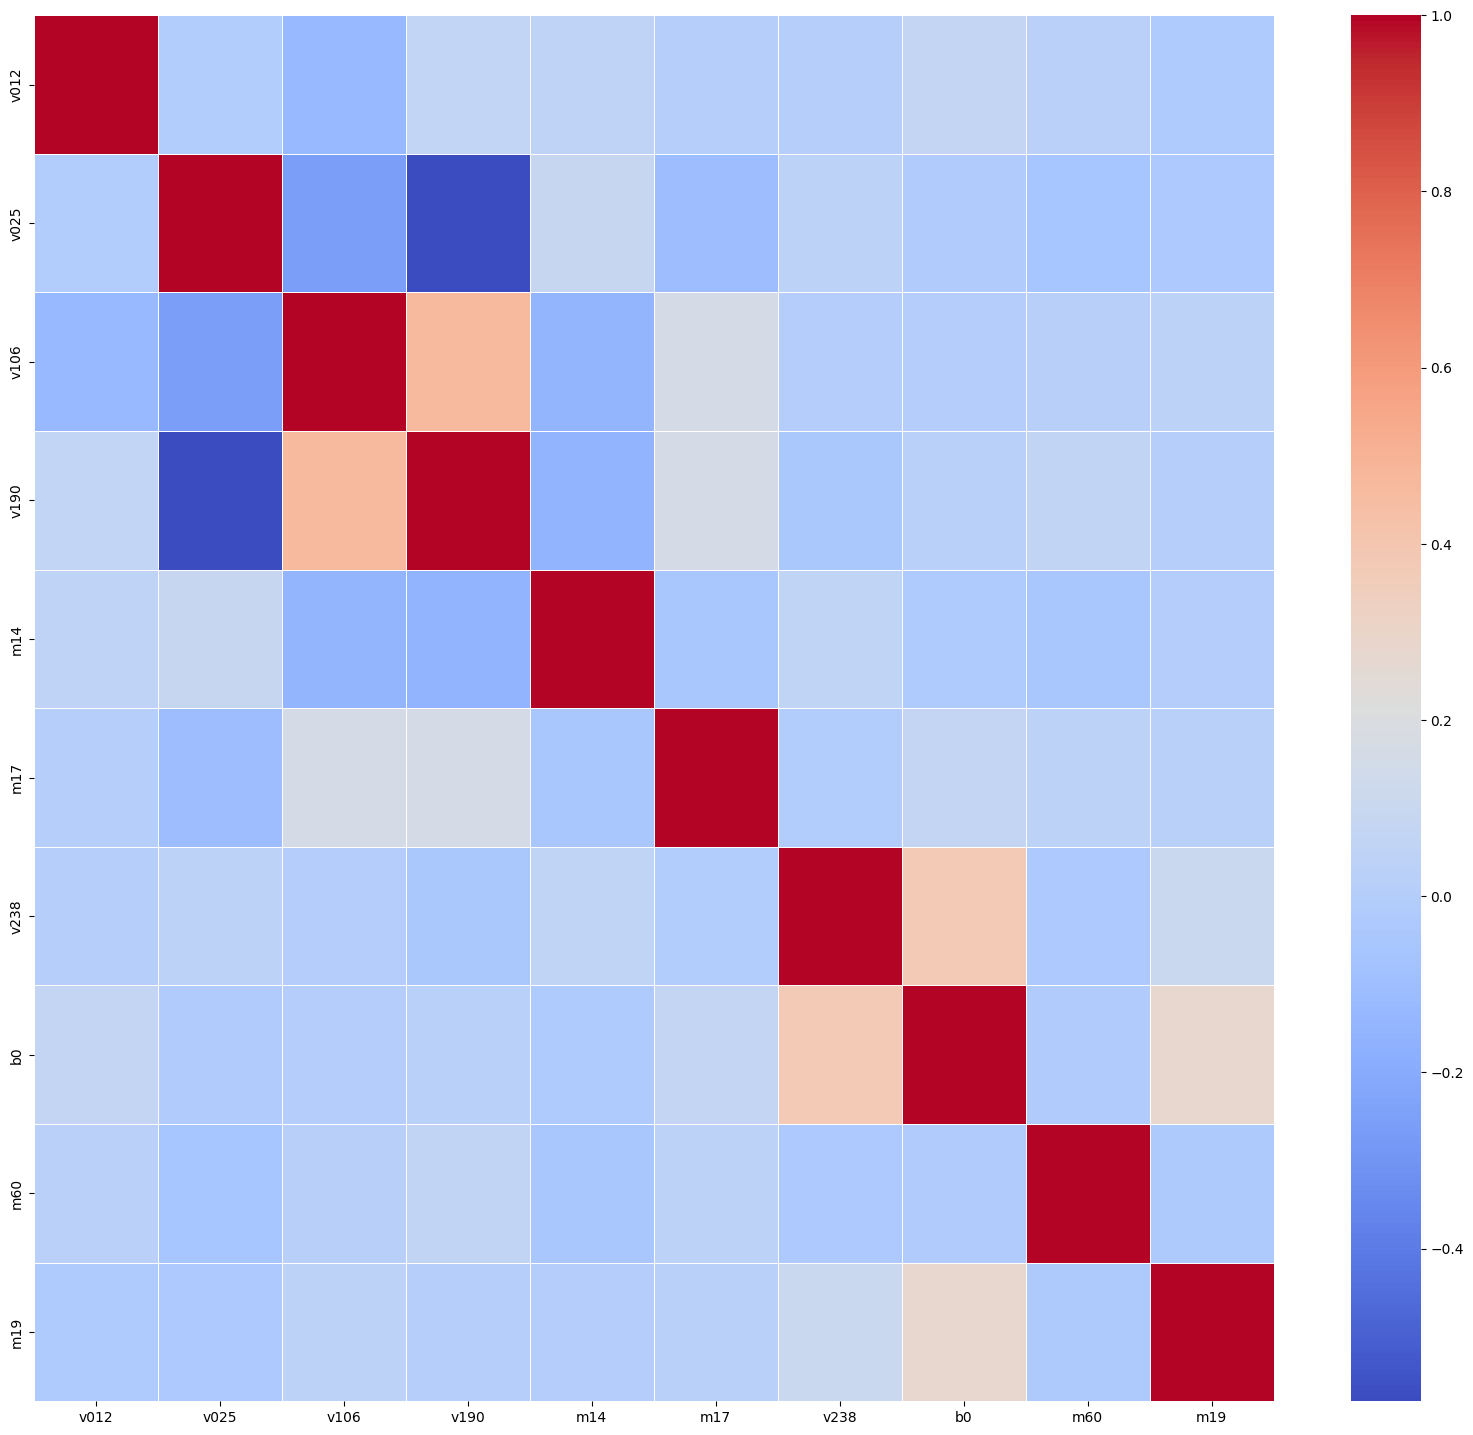

In [34]:
# Creating a correlation matrix
corr_matrix = X_train_with_target.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.show()

In [35]:
#  Checking correlation between each feature and the target variable, then sorting in descending order
X_train_with_target.corr().m19.sort_values(ascending=False)

m19     1.000000
b0      0.275061
v238    0.105794
v106    0.037681
m17     0.017560
v190    0.009545
m14     0.003192
v012   -0.023445
m60    -0.032439
v025   -0.033422
Name: m19, dtype: float64

## Feature importance

In [36]:
#import package 
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

[0.21036929 0.05653344 0.11143605 0.22047624 0.07507199 0.06012199
 0.04486997 0.13940214 0.08171888]


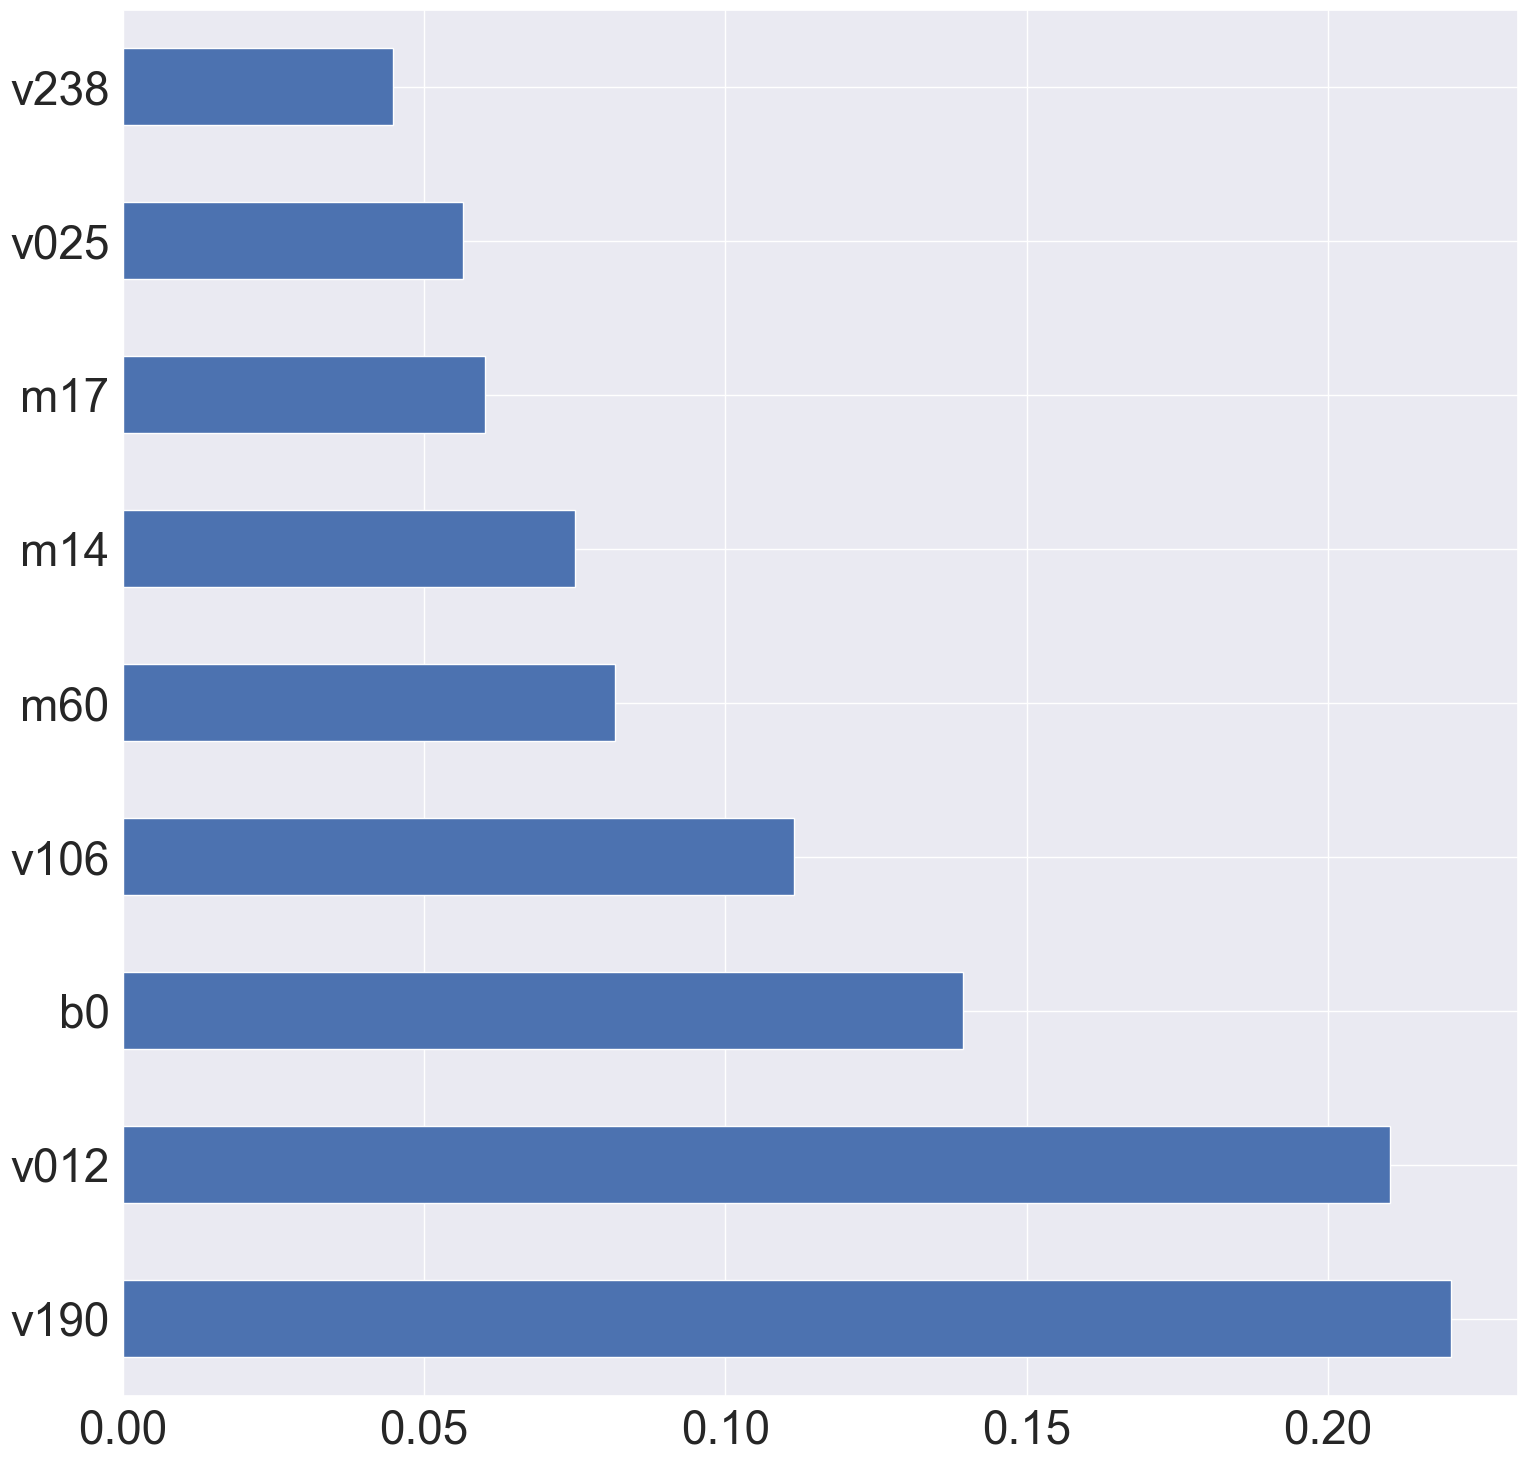

In [37]:
#create model for training 
model = RandomForestClassifier()
model.fit(predictor_features,target_feature)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=predictor_features.columns)

# show the first 8 important features 
fig= plt.figure(figsize=(18,18))
sns.set(font_scale = 3)
feature_importances.nlargest(9).plot(kind='barh')
plt.show()

## Feature selection - Univariate selection

In [38]:
# import packages 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [39]:
#apply SelectKBest class to extract top 9 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)

#train to find best features
fit = bestfeatures.fit(predictor_features,target_feature)

#save in the dataframe 
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(predictor_features.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#naming the dataframe columns
featureScores.columns = ['Specs','Score'] 

#print 8 best features 
print(featureScores.nlargest(8,'Score'))  

  Specs       Score
7    b0  540.603078
8   m60    3.758253
6  v238    3.475004
2  v106    2.209726
0  v012    1.706984
4   m14    1.223710
5   m17    1.003209
1  v025    0.641114


Variables **b0**, followed by **m60**, then **v238**, **v106**, **v012**, **m14** are the  most relevant features to the target variable s thus will be used in **hypothesis formulation** and performing **bivariate analysis** for confirmation

**Where;**
    '**b0**':'child is twin',
    '**m60**': 'Drugs for intestinal parasites'
    '**v238**': 'Birth in the last 3 years',
    '**v106**': 'highest educational level',
    '**v012**': 'respondent's current age',
    '**m14**': 'number of antenatal visits during pregnancy'

## Hypothesis formulation

**1.** Babies born in twin pregnancies are more likely to have low birth weight - **FALSE**

**2.** Treating intestinal parasites during pregnancy may reduce the risk of LBW - **FALSE**

**3.** Mothers with higher education are less likely to have LBW babies - **TRUE**

**4.** Older mothers (i.e more aged) are more likely to have LBW babies - **FALSE**

**5.** Regular antenatal care (i.e more ANC visits) may reduce the risk of LBW - **TRUE**

**6.** Women who have given birth in the last 3 years more than once are more likely to deliver a low birth weight infant. - **TRUE**

## Bivariate analysis

<Figure size 8000x1000 with 0 Axes>

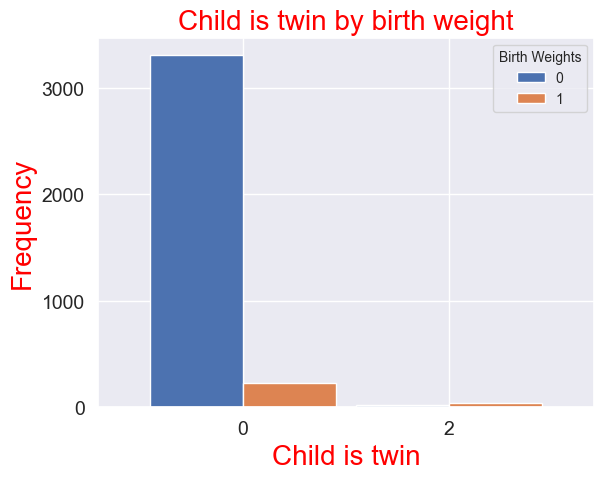

In [40]:
# Counting the frequency of each unique value in the column
child_records = X_train_with_target.groupby('b0')['m19'].value_counts().unstack(fill_value=0).sort_index()

# Plotting the bar graph
plt.figure(figsize=(80, 10))  # Adjust width and height as needed

child_records.plot(kind='bar', stacked=False, width=0.9)
plt.xlabel('Child is twin', fontsize ='20', fontname='Arial', color='red')
plt.ylabel('Frequency',fontsize ='20', fontname='Arial', color='red')

plt.xticks(fontsize=14)  # Set x-axis tick label font size
plt.yticks(fontsize=14)

plt.title('Child is twin by birth weight', fontsize ='20', fontname='Arial', color='red')
plt.legend(title='Birth Weights', title_fontsize='10', fontsize ='10')
plt.xticks(rotation=0)
plt.show()

**Where:**
  
**0:** Single birth

**2:** Second of multiple

<Figure size 8000x1000 with 0 Axes>

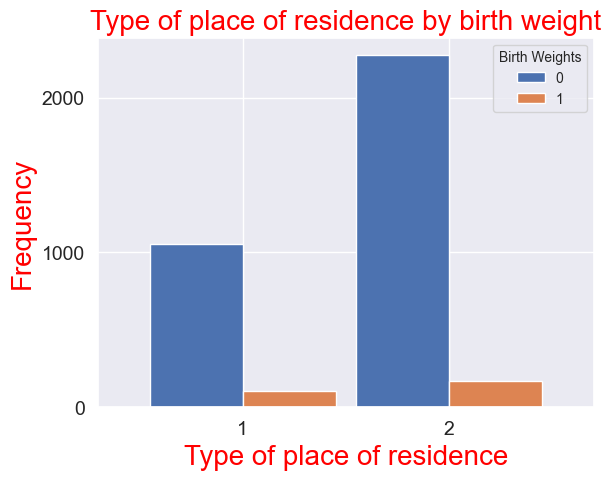

In [41]:
# Counting the frequency of each unique value in the column
child_records = X_train_with_target.groupby('v025')['m19'].value_counts().unstack(fill_value=0).sort_index()

# Plotting the bar graph
plt.figure(figsize=(80, 10))  # Adjust width and height as needed

child_records.plot(kind='bar', stacked=False, width=0.9)
plt.xlabel('Type of place of residence', fontsize ='20', fontname='Arial', color='red')
plt.ylabel('Frequency',fontsize ='20', fontname='Arial', color='red')

plt.xticks(fontsize=14)  # Set x-axis tick label font size
plt.yticks(fontsize=14)

plt.title('Type of place of residence by birth weight', fontsize ='20', fontname='Arial', color='red')
plt.legend(title='Birth Weights', title_fontsize='10', fontsize ='10')
plt.xticks(rotation=0)
plt.show()

**Where:**
  
**1:** Urban

**2:** Rural

<Figure size 8000x1000 with 0 Axes>

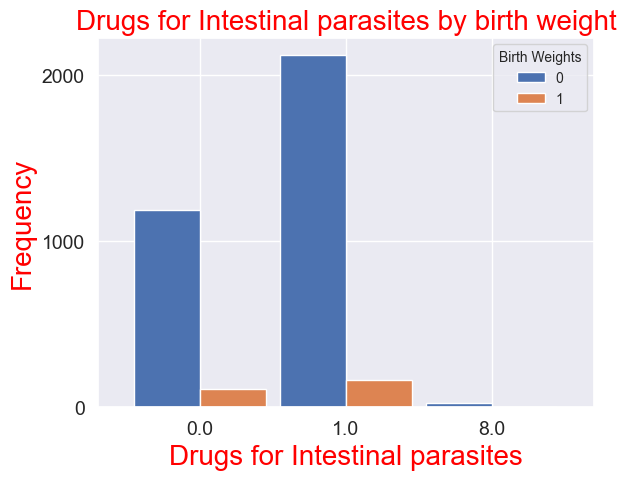

In [42]:
# Counting the frequency of each unique value in the column
child_records = X_train_with_target.groupby('m60')['m19'].value_counts().unstack(fill_value=0).sort_index()

# Plotting the bar graph
plt.figure(figsize=(80, 10))  # Adjust width and height as needed

child_records.plot(kind='bar', stacked=False, width=0.9)
plt.xlabel('Drugs for Intestinal parasites', fontsize ='20', fontname='Arial', color='red')
plt.ylabel('Frequency',fontsize ='20', fontname='Arial', color='red')

plt.xticks(fontsize=14)  # Set x-axis tick label font size
plt.yticks(fontsize=14)

plt.title('Drugs for Intestinal parasites by birth weight', fontsize ='20', fontname='Arial', color='red')
plt.legend(title='Birth Weights', title_fontsize='10', fontsize ='10')
plt.xticks(rotation=0)
plt.show()

**Where:** 

**0:** No

**1:** Yes

**8** Don't know

<Figure size 8000x1000 with 0 Axes>

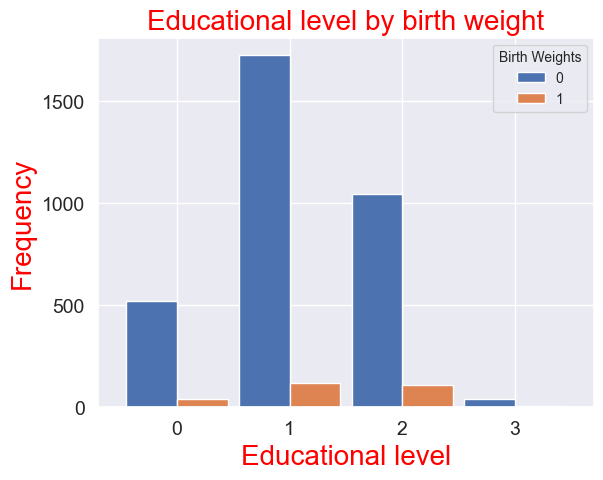

In [43]:
# Counting the frequency of each unique value in the column
child_records = X_train_with_target.groupby('v106')['m19'].value_counts().unstack(fill_value=0).sort_index()

# Plotting the bar graph
plt.figure(figsize=(80, 10))  # Adjust width and height as needed

child_records.plot(kind='bar', stacked=False, width=0.9)
plt.xlabel('Educational level', fontsize ='20', fontname='Arial', color='red')
plt.ylabel('Frequency',fontsize ='20', fontname='Arial', color='red')

plt.xticks(fontsize=14)  # Set x-axis tick label font size
plt.yticks(fontsize=14)

plt.title('Educational level by birth weight', fontsize ='20', fontname='Arial', color='red')
plt.legend(title='Birth Weights', title_fontsize='10', fontsize ='10')
plt.xticks(rotation=0)
plt.show()

**Where:** 

**0:** No education

**1:** Primary

**2:** Secondary

**3:** Higher

<Figure size 1200x800 with 0 Axes>

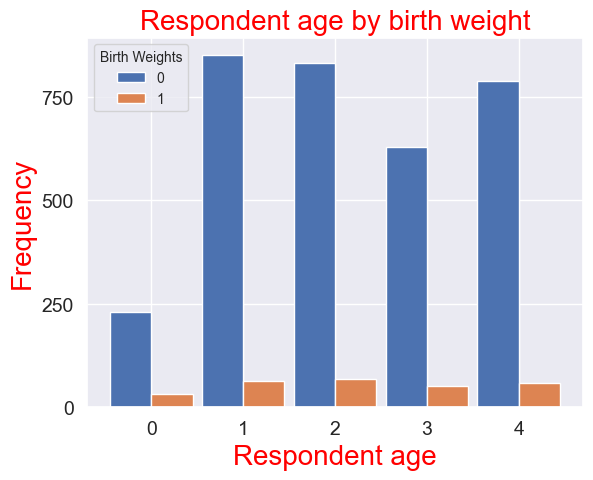

In [44]:
# Counting the frequency of each unique value in the column
child_records = X_train_with_target.groupby('v012')['m19'].value_counts().unstack(fill_value=0).sort_index()

# Plotting the vertical bar chart
plt.figure(figsize=(12, 8))  # Adjust width and height as needed

# Creating the vertical bar chart
child_records.plot(kind='bar', stacked=False, width=0.9)

plt.xlabel('Respondent age', fontsize=20, fontname='Arial', color='red')
plt.ylabel('Frequency', fontsize=20, fontname='Arial', color='red')

plt.xticks(fontsize=14, rotation=0)  # Set x-axis tick label font size and rotation
plt.yticks(fontsize=14)  # Set y-axis tick label font size

plt.title('Respondent age by birth weight', fontsize=20, fontname='Arial', color='red')
plt.legend(title='Birth Weights', title_fontsize='10', fontsize=10)
plt.xticks()
plt.show()


**Where:** 

**0:** 15-19

**1:** 20-24

**2:** 25-29

**3:** 30-34

**4:** 35-49

<Figure size 1200x800 with 0 Axes>

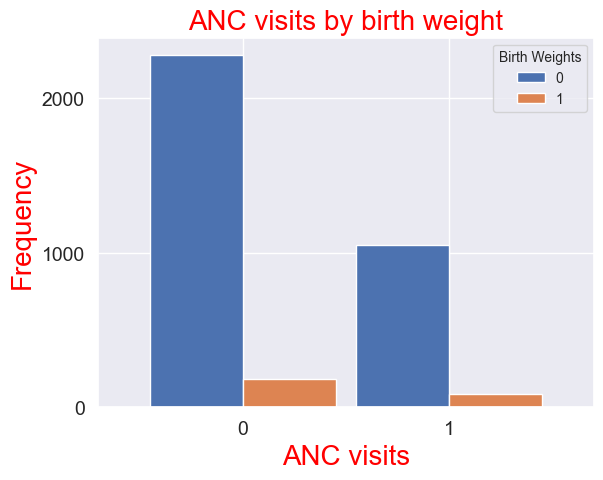

In [45]:
# Counting the frequency of each unique value in the column
child_records = X_train_with_target.groupby('m14')['m19'].value_counts().unstack(fill_value=0).sort_index()

# Plotting the vertical bar chart
plt.figure(figsize=(12, 8))  # Adjust width and height as needed

# Creating the vertical bar chart
child_records.plot(kind='bar', stacked=False, width=0.9)

plt.xlabel('ANC visits', fontsize=20, fontname='Arial', color='red')
plt.ylabel('Frequency', fontsize=20, fontname='Arial', color='red')

plt.xticks(fontsize=14, rotation=0)  # Set x-axis tick label font size and rotation
plt.yticks(fontsize=14)  # Set y-axis tick label font size

plt.title('ANC visits by birth weight', fontsize=20, fontname='Arial', color='red')
plt.legend(title='Birth Weights', title_fontsize='10', fontsize=10)
plt.xticks(rotation=0)
plt.show()


**Where:** 

**0:** ANC vists < 4

**1:** ANC visits >= 4

<Figure size 1200x800 with 0 Axes>

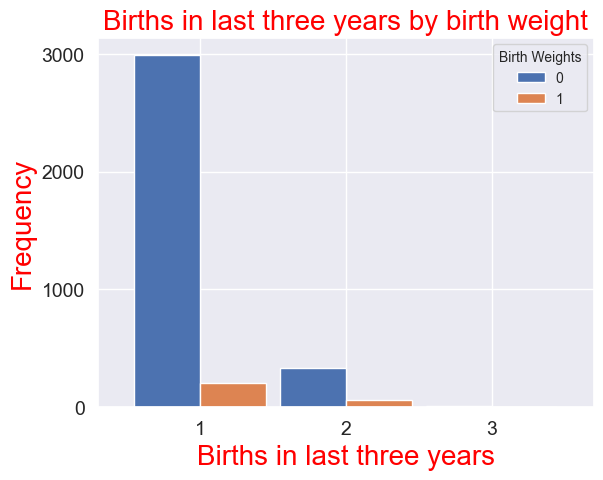

In [46]:
# Counting the frequency of each unique value in the column
child_records = X_train_with_target.groupby('v238')['m19'].value_counts().unstack(fill_value=0).sort_index()

# Plotting the vertical bar chart
plt.figure(figsize=(12, 8))  # Adjust width and height as needed

# Creating the vertical bar chart
child_records.plot(kind='bar', stacked=False, width=0.9)

plt.xlabel('Births in last three years', fontsize=20, fontname='Arial', color='red')
plt.ylabel('Frequency', fontsize=20, fontname='Arial', color='red')

plt.xticks(fontsize=14, rotation=0)  # Set x-axis tick label font size and rotation
plt.yticks(fontsize=14)  # Set y-axis tick label font size

plt.title('Births in last three years by birth weight', fontsize=20, fontname='Arial', color='red')
plt.legend(title='Birth Weights', title_fontsize='10', fontsize=10)
plt.xticks()
plt.show()


## Model training using various classification algorithms

### 1st Evaluation Metric:  Accuracy

In [59]:
from sklearn.ensemble import HistGradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SMOTE
smote = SMOTE(random_state=0)

# Apply SMOTE to balance the classes
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on X_train_balanced
X_train_balanced_imputed = imputer.fit_transform(X_train_balanced)

# Initialize classifiers
hist_gradient_boosting_classifier = HistGradientBoostingClassifier(random_state=0)
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)
dt_classifier = DecisionTreeClassifier(random_state=0)
random_forest_classifier = RandomForestClassifier(random_state=0)

# List of classifiers
classifiers = {
    "HistGradientBoosting Classifier": hist_gradient_boosting_classifier,
    "Bagging Classifier": bagging_classifier,
    "Decision Tree Classifier": dt_classifier,
    "Random Forest Classifier": random_forest_classifier,
}

# Function to calculate and print accuracy for each classifier
def calculate_accuracy():
    for clf_name, clf in classifiers.items():
        # Train the classifier
        clf.fit(X_train_balanced_imputed, y_train_balanced)

        # Transform X_test with the fitted imputer (only transform, no fit)
        X_test_imputed = imputer.transform(X_test)

        # Predict on X_test
        y_pred = clf.predict(X_test_imputed)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{clf_name} Accuracy: {accuracy:.4f}")

# Calculate and print accuracy for each classifier
calculate_accuracy()


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

### 2nd Evaluation Metric: F1 score

In [ ]:
# Function to calculate and print F1 score for each classifier
def calculate_f1_score():
    for clf_name, clf in classifiers.items():
        # Train the classifier
        clf.fit(X_train_balanced_imputed, y_train_balanced)

        # Transform X_test with the fitted imputer (only transform, no fit)
        X_test_imputed = imputer.transform(X_test)

        # Predict on X_test
        y_pred = clf.predict(X_test_imputed)

        # Calculate F1 score
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f"{clf_name} F1 Score: {f1:.4f}")

# Calculate and print F1 score for each classifier
calculate_f1_score()


HistGradientBoosting Classifier F1 Score: 0.8175
Bagging Classifier F1 Score: 0.7863
Decision Tree Classifier F1 Score: 0.7976
Random Forest Classifier F1 Score: 0.7957


### 3rd Evaluation Metric: Confusion Matrix 

Confusion Matrix for HistGradientBoosting Classifier:
[[697 129]
 [ 61  14]]


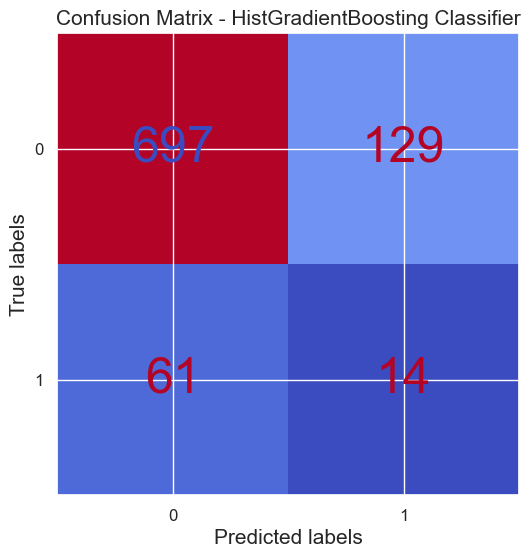

Confusion Matrix for Bagging Classifier:
[[656 170]
 [ 63  12]]


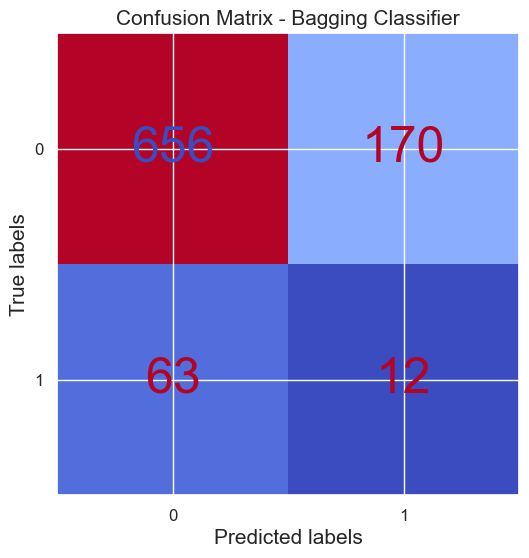

Confusion Matrix for Decision Tree Classifier:
[[672 154]
 [ 63  12]]


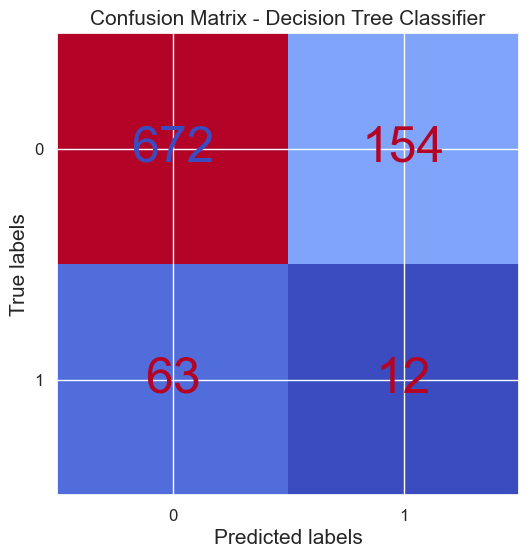

Confusion Matrix for Random Forest Classifier:
[[671 155]
 [ 64  11]]


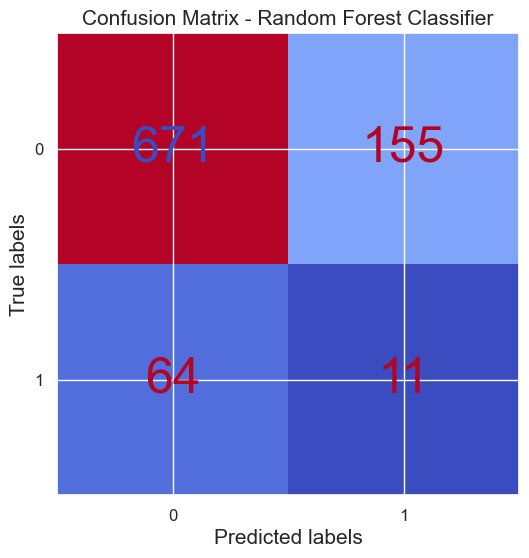

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Initialize SMOTE
smote = SMOTE(random_state=0)

# Apply SMOTE to balance the classes
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on X_train_balanced
X_train_balanced_imputed = imputer.fit_transform(X_train_balanced)

# Initialize classifiers
hist_gradient_boosting_classifier = HistGradientBoostingClassifier(random_state=0)
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)
dt_classifier = DecisionTreeClassifier(random_state=0)
random_forest_classifier = RandomForestClassifier(random_state=0)

# List of classifiers
classifiers = {
    "HistGradientBoosting Classifier": hist_gradient_boosting_classifier,
    "Bagging Classifier": bagging_classifier,
    "Decision Tree Classifier": dt_classifier,
    "Random Forest Classifier": random_forest_classifier,
}

# Function to generate confusion matrix for each classifier
def generate_confusion_matrix():
    classes = sorted(np.unique(y_test))  # Get unique classes from y_test
    for clf_name, clf in classifiers.items():
        # Train the classifier
        clf.fit(X_train_balanced_imputed, y_train_balanced)

        # Transform X_test with the fitted imputer (only transform, no fit)
        X_test_imputed = imputer.transform(X_test)

        # Predict on X_test
        y_pred = clf.predict(X_test_imputed)

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred, labels=classes)
        print(f"Confusion Matrix for {clf_name}:")
        print(conf_matrix)

        # Plot confusion matrix using ConfusionMatrixDisplay
        cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=classes)

        # Plot confusion matrix with ConfusionMatrixDisplay and adjust annotations
        fig, ax = plt.subplots(figsize=(8, 6))
        cm_display.plot(ax=ax, cmap='coolwarm', colorbar=False)

        plt.xlabel('Predicted labels', fontsize=15)
        plt.ylabel('True labels', fontsize=15)
        plt.title(f'Confusion Matrix - {clf_name}', fontsize=15)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()

# Generate confusion matrix for each classifier
generate_confusion_matrix()


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the classifiers
classifiers = [
    BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0),
    RandomForestClassifier(random_state=0),
    HistGradientBoostingClassifier(random_state=0)
]

# Perform cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

results = []
for clf in classifiers:
    scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(scores)

# Print the results
for i, clf in enumerate(classifiers):
    print(f"Algorithm: {clf.__class__.__name__}")
    print(f"Cross-Validation Results: {results[i]}")
    print(f"Mean Accuracy: {results[i].mean():.4f}")
    print()


Algorithm: BaggingClassifier
Cross-Validation Results: [0.91666667 0.9125     0.90416667 0.89722222 0.93055556]
Mean Accuracy: 0.9122

Algorithm: RandomForestClassifier
Cross-Validation Results: [0.92222222 0.90972222 0.90833333 0.9125     0.9375    ]
Mean Accuracy: 0.9181

Algorithm: HistGradientBoostingClassifier
Cross-Validation Results: [0.92361111 0.92083333 0.92361111 0.92222222 0.93611111]
Mean Accuracy: 0.9253



- **HistGradientBoostingClassifier (0.9253)** is the top-performing algorithm on this dataset.
- The differences in mean accuracy between these algorithms are relatively small, indicating that the choice of algorithm may not be critical for this particular problem.

In [48]:
import joblib
joblib.dump(hist_gradient_boosting_classifier,'/Users/kalokola/group5/Low-Birth-Weight-Prediction-app/MODEL/histgradientboosting-model.pkl')
#C:\\Users\\ELITEX21012G2\\Desktop\\LBW Prediction\\DATA\\

['/Users/kalokola/group5/Low-Birth-Weight-Prediction-app/MODEL/histgradientboosting-model.pkl']

In [60]:
# Train the classifier
hist_gradient_boosting_classifier.fit(X_train_balanced_imputed, y_train_balanced)

# Transform X_test with the fitted imputer (only transform, no fit)
X_test_imputed = imputer.transform(X_test)

# Predict on X_test
y_pred = hist_gradient_boosting_classifier.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.4f}")

 Accuracy: 0.7636


In [61]:
import joblib
joblib.dump(hist_gradient_boosting_classifier,'/Users/kalokola/group5/Low-Birth-Weight-Prediction-app/MODEL/greens.pkl')
#C:\\Users\\ELITEX21012G2\\Desktop\\LBW Prediction\\DATA\\

['/Users/kalokola/group5/Low-Birth-Weight-Prediction-app/MODEL/greens.pkl']

In [63]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# Assuming your model is already trained and saved as 'hist_gradient_boost_model.pkl'
# Load the trained model
# model_path = '/Users/kalokola/group5/Low-Birth-Weight-Prediction-app/MODEL/histgradientboosting-model.pkl'
model_path = '/Users/kalokola/group5/Low-Birth-Weight-Prediction-app/MODEL/greens.pkl'
hey = joblib.load(model_path)


In [68]:
list(X_test.iloc[0])

[3.0, 1.0, 1.0, 5.0, 1.0, 0.0, 1.0, 0.0, 1.0]

In [66]:
hey.predict((X_test.iloc[0],))

array([0])